In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils.random import sample_without_replacement
from tensorflow.image import central_crop

In [5]:
def load_dataset():
    with h5py.File("../datasets/raw/qg/quark-gluon_test-set_n139306.hdf5", "r") as f:
        n = 120000
        keys = list(f.keys())
        for i in keys:
            print(i, f[i].shape)
        data = {keys[0]: f[keys[0]][0:n],
                keys[3]: f[keys[3]][0:n]}

        # qg = np.asarray(f['X'][()], dtype=np.float32)
        # py = np.asarray(f['y'][()], dtype=np.float32)
        # print("Loaded photon dataset!")

    # with h5py.File("/content/drive/My Drive/electron-photon-dataset/electron.hdf5", "r") as f:
    #     ex = np.asarray(f['X'][()], dtype=np.float32)
    #     ey = np.asarray(f['y'][()], dtype=np.float32)
    #     print("Loaded electron dataset!")

    # print("Photon dataset shape:", px.shape, py.shape)
    # print("Electron dataset shape:", ex.shape, ey.shape)
    # return px,py,ex,ey
    return data

In [13]:
data = load_dataset()

X_jets (139306, 125, 125, 3)
m0 (139306,)
pt (139306,)
y (139306,)


tcmalloc: large alloc 22500007936 bytes == 0x8388000 @  0x7fbbc259a680 0x7fbbc25ba2ec 0x7fbbb62b5fae 0x7fbbb62b688e 0x7fbbb6314d87 0x7fbbb63168da 0x7fbb129fdcf9 0x7fbb129f9568 0x505166 0x56bbfa 0x569dba 0x4eb54f 0x7fbb15595aac 0x7fbb1559e6ba 0x5f74f6 0x50c358 0x5fe736 0x59eb75 0x5139cc 0x56bf28 0x5f6cd6 0x56bacd 0x569dba 0x6902a7 0x6023c4 0x5c6730 0x56bacd 0x501488 0x56d4d6 0x501488 0x56d4d6


In [14]:
print(data['X_jets'].shape)
print(max(data['y']), min(data['y']))

zeros = (data['y'] == 0)
ones = (data['y'] == 1)
print(sum(ones), sum(zeros))

(120000, 125, 125, 3)
1.0 0.0
60000 60000


In [15]:
data0 = data['X_jets'][zeros]
data1 = data['X_jets'][ones]
del data

tcmalloc: large alloc 11250008064 bytes == 0x590504000 @  0x7fbbc259a680 0x7fbbc25bb824 0x7fbbb62b6064 0x7fbbb62b67ff 0x7fbbb6314fc5 0x7fbbb6315126 0x7fbbb63a77ea 0x7fbbb63a824b 0x5139cc 0x56bf28 0x569dba 0x6902a7 0x6023c4 0x5c6730 0x56bacd 0x501488 0x56d4d6 0x501488 0x56d4d6 0x501488 0x505166 0x56bbfa 0x5f6cd6 0x56bacd 0x5f6cd6 0x56bbfa 0x569dba 0x5f6eb3 0x50bc2c 0x5f6082 0x56d2d5
tcmalloc: large alloc 11250008064 bytes == 0x876e46000 @  0x7fbbc259a680 0x7fbbc25bb824 0x7fbbb62b6064 0x7fbbb62b67ff 0x7fbbb6314fc5 0x7fbbb6315126 0x7fbbb63a77ea 0x7fbbb63a824b 0x5139cc 0x56bf28 0x569dba 0x6902a7 0x6023c4 0x5c6730 0x56bacd 0x501488 0x56d4d6 0x501488 0x56d4d6 0x501488 0x505166 0x56bbfa 0x5f6cd6 0x56bacd 0x5f6cd6 0x56bbfa 0x569dba 0x5f6eb3 0x50bc2c 0x5f6082 0x56d2d5


In [16]:
def crop_center(img,cropx,cropy):
    x,y = img.shape[1:3]
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[:,startx:startx+cropx,starty:starty+cropy,:]

In [34]:
def display_data(data, label, thresh=0):
    fig = plt.figure(figsize=(12,12))
    r = 1
    c = 3
    for i in range(3):
        fig.add_subplot(r,c,i+1)
        if thresh:
            m = np.mean(data[:, :,:, i], axis=0).mean()
            plt.imshow(np.mean(data[:, :,:, i], axis=0) >= m)
        else:
            plt.imshow(np.log(np.mean(data[:, :,:, i], axis=0)))

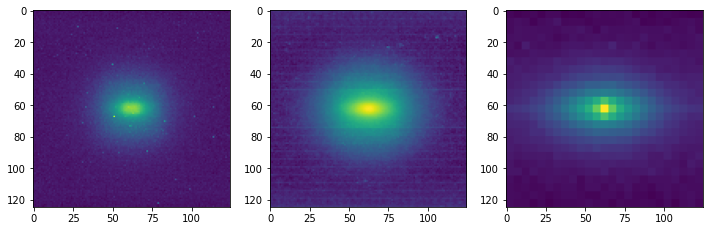

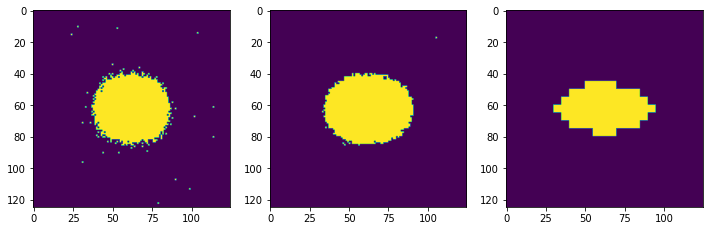

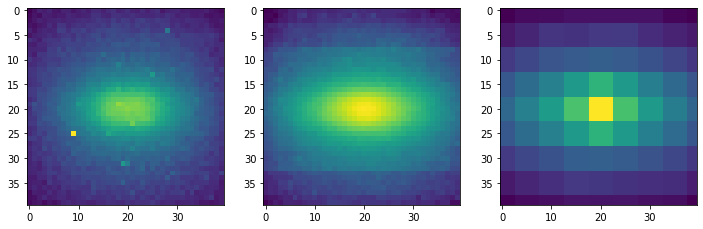

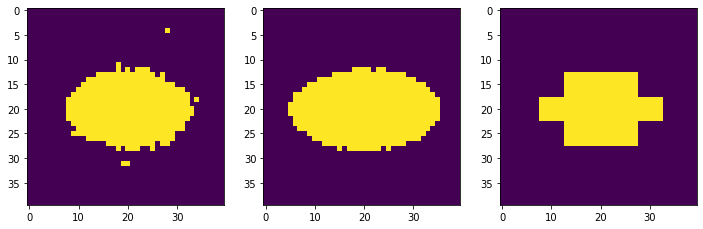

In [35]:
display_data(data0,"Gluon")
display_data(data0,"Gluon",thresh=1)
display_data(crop_center(data0, 40, 40),"Gluon")
display_data(crop_center(data0, 40, 40),"Gluon",thresh=1)

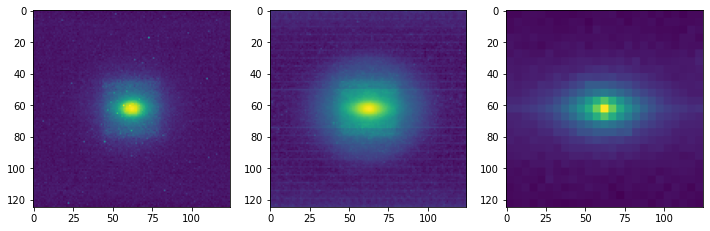

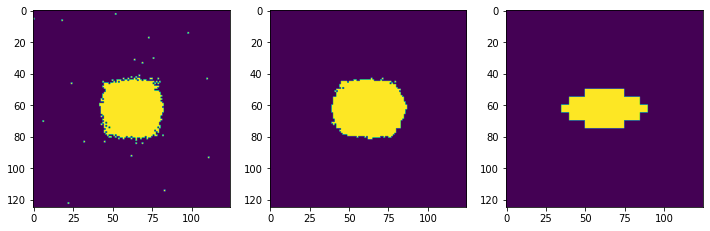

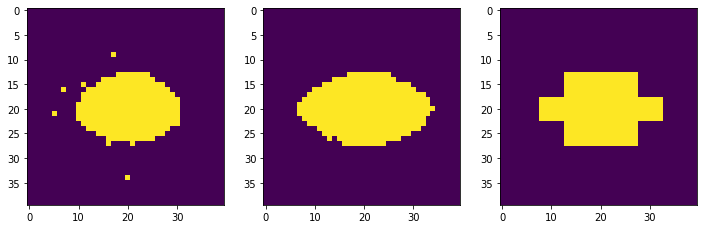

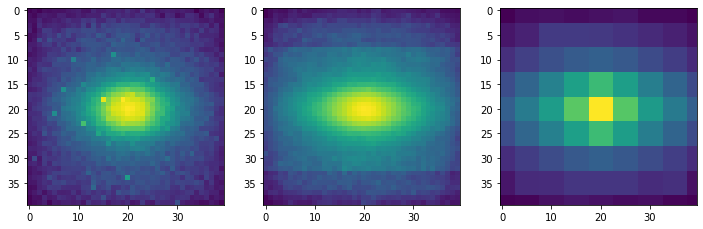

In [36]:
display_data(data1,"Quark")
display_data(data1,"Quark",1)
display_data(crop_center(data1, 40, 40),"Quark",thresh=1)
display_data(crop_center(data1, 40, 40),"Quark")

In [17]:
data0 = crop_center(data0, 40, 40)[:,:,:,1][..., np.newaxis]   # ECAL Channel
data1 = crop_center(data1, 40, 40)[:,:,:,0][..., np.newaxis]   # ECAL Channel

print(data0.shape, data1.shape)

(60000, 40, 40, 2) (60000, 40, 40, 2)


In [18]:
zeros = np.array([0]*len(data0))
ones = np.array([1]*len(data1))

x = np.concatenate((data0,data1), axis =0)
y = np.concatenate((zeros,ones), axis= 0)
del data0, data1

print(x.shape, y.shape)

tcmalloc: large alloc 1536000000 bytes == 0x8388000 @  0x7fbbc259a680 0x7fbbc25bb824 0x7fbbb62b6064 0x7fbbb62b67ff 0x7fbbb6314fc5 0x7fbbb63b89f9 0x7fbbb63b9147 0x7fbbb63b929c 0x6b5d3d 0x7fbbb62fdf24 0x5f69ca 0x5f74f6 0x570d55 0x569dba 0x5f6eb3 0x56cc1f 0x569dba 0x6902a7 0x6023c4 0x5c6730 0x56bacd 0x501488 0x56d4d6 0x501488 0x56d4d6 0x501488 0x505166 0x56bbfa 0x5f6cd6 0x56bacd 0x5f6cd6


(120000, 40, 40, 2) (120000,)


In [19]:
x, y = shuffle(x,y)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.16666, random_state=4, stratify=y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100000, 40, 40, 2) (100000,)
(20000, 40, 40, 2) (20000,)


In [20]:
np.savez_compressed('../datasets/processed/quark_gluon_2.npz', **{
    'x_train': x_train,
    'y_train':y_train,
    'x_test':x_test,
    'y_test':y_test
})

del x_train, x_test, y_train, y_test

In [21]:
data = np.load('../datasets/processed/quark_gluon_2.npz', allow_pickle=True)

In [22]:
data['x_train'].shape

(100000, 40, 40, 2)

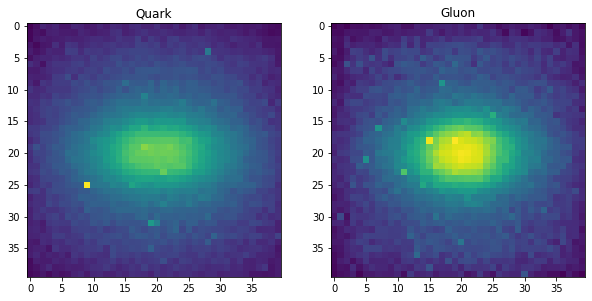

In [43]:
fig2 = plt.figure(figsize=(10,10))
r = 1
c = 2
index = [np.where(data['y_train'] == 0)[0], np.where(data['y_train'] == 1)[0]]
for i in range(2):
    fig2.add_subplot(r,c,i+1)
    plt.imshow(np.log(np.mean(data['x_train'][index[i],:,:,0], axis=0)))
    plt.title('Quark' if i == 0 else 'Gluon')